In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 


In [3]:
data_bikes = pd.read_csv("day.csv")
data_bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
#Checking the structure of the data set
data_bikes.shape


(730, 16)

In [5]:
#Checking if any missing values
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data_bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
#Drop the first column instant and dteday as they are not useful to our analysis anyway
data_bikes.drop(['instant','dteday'], axis=1, inplace=True)
data_bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

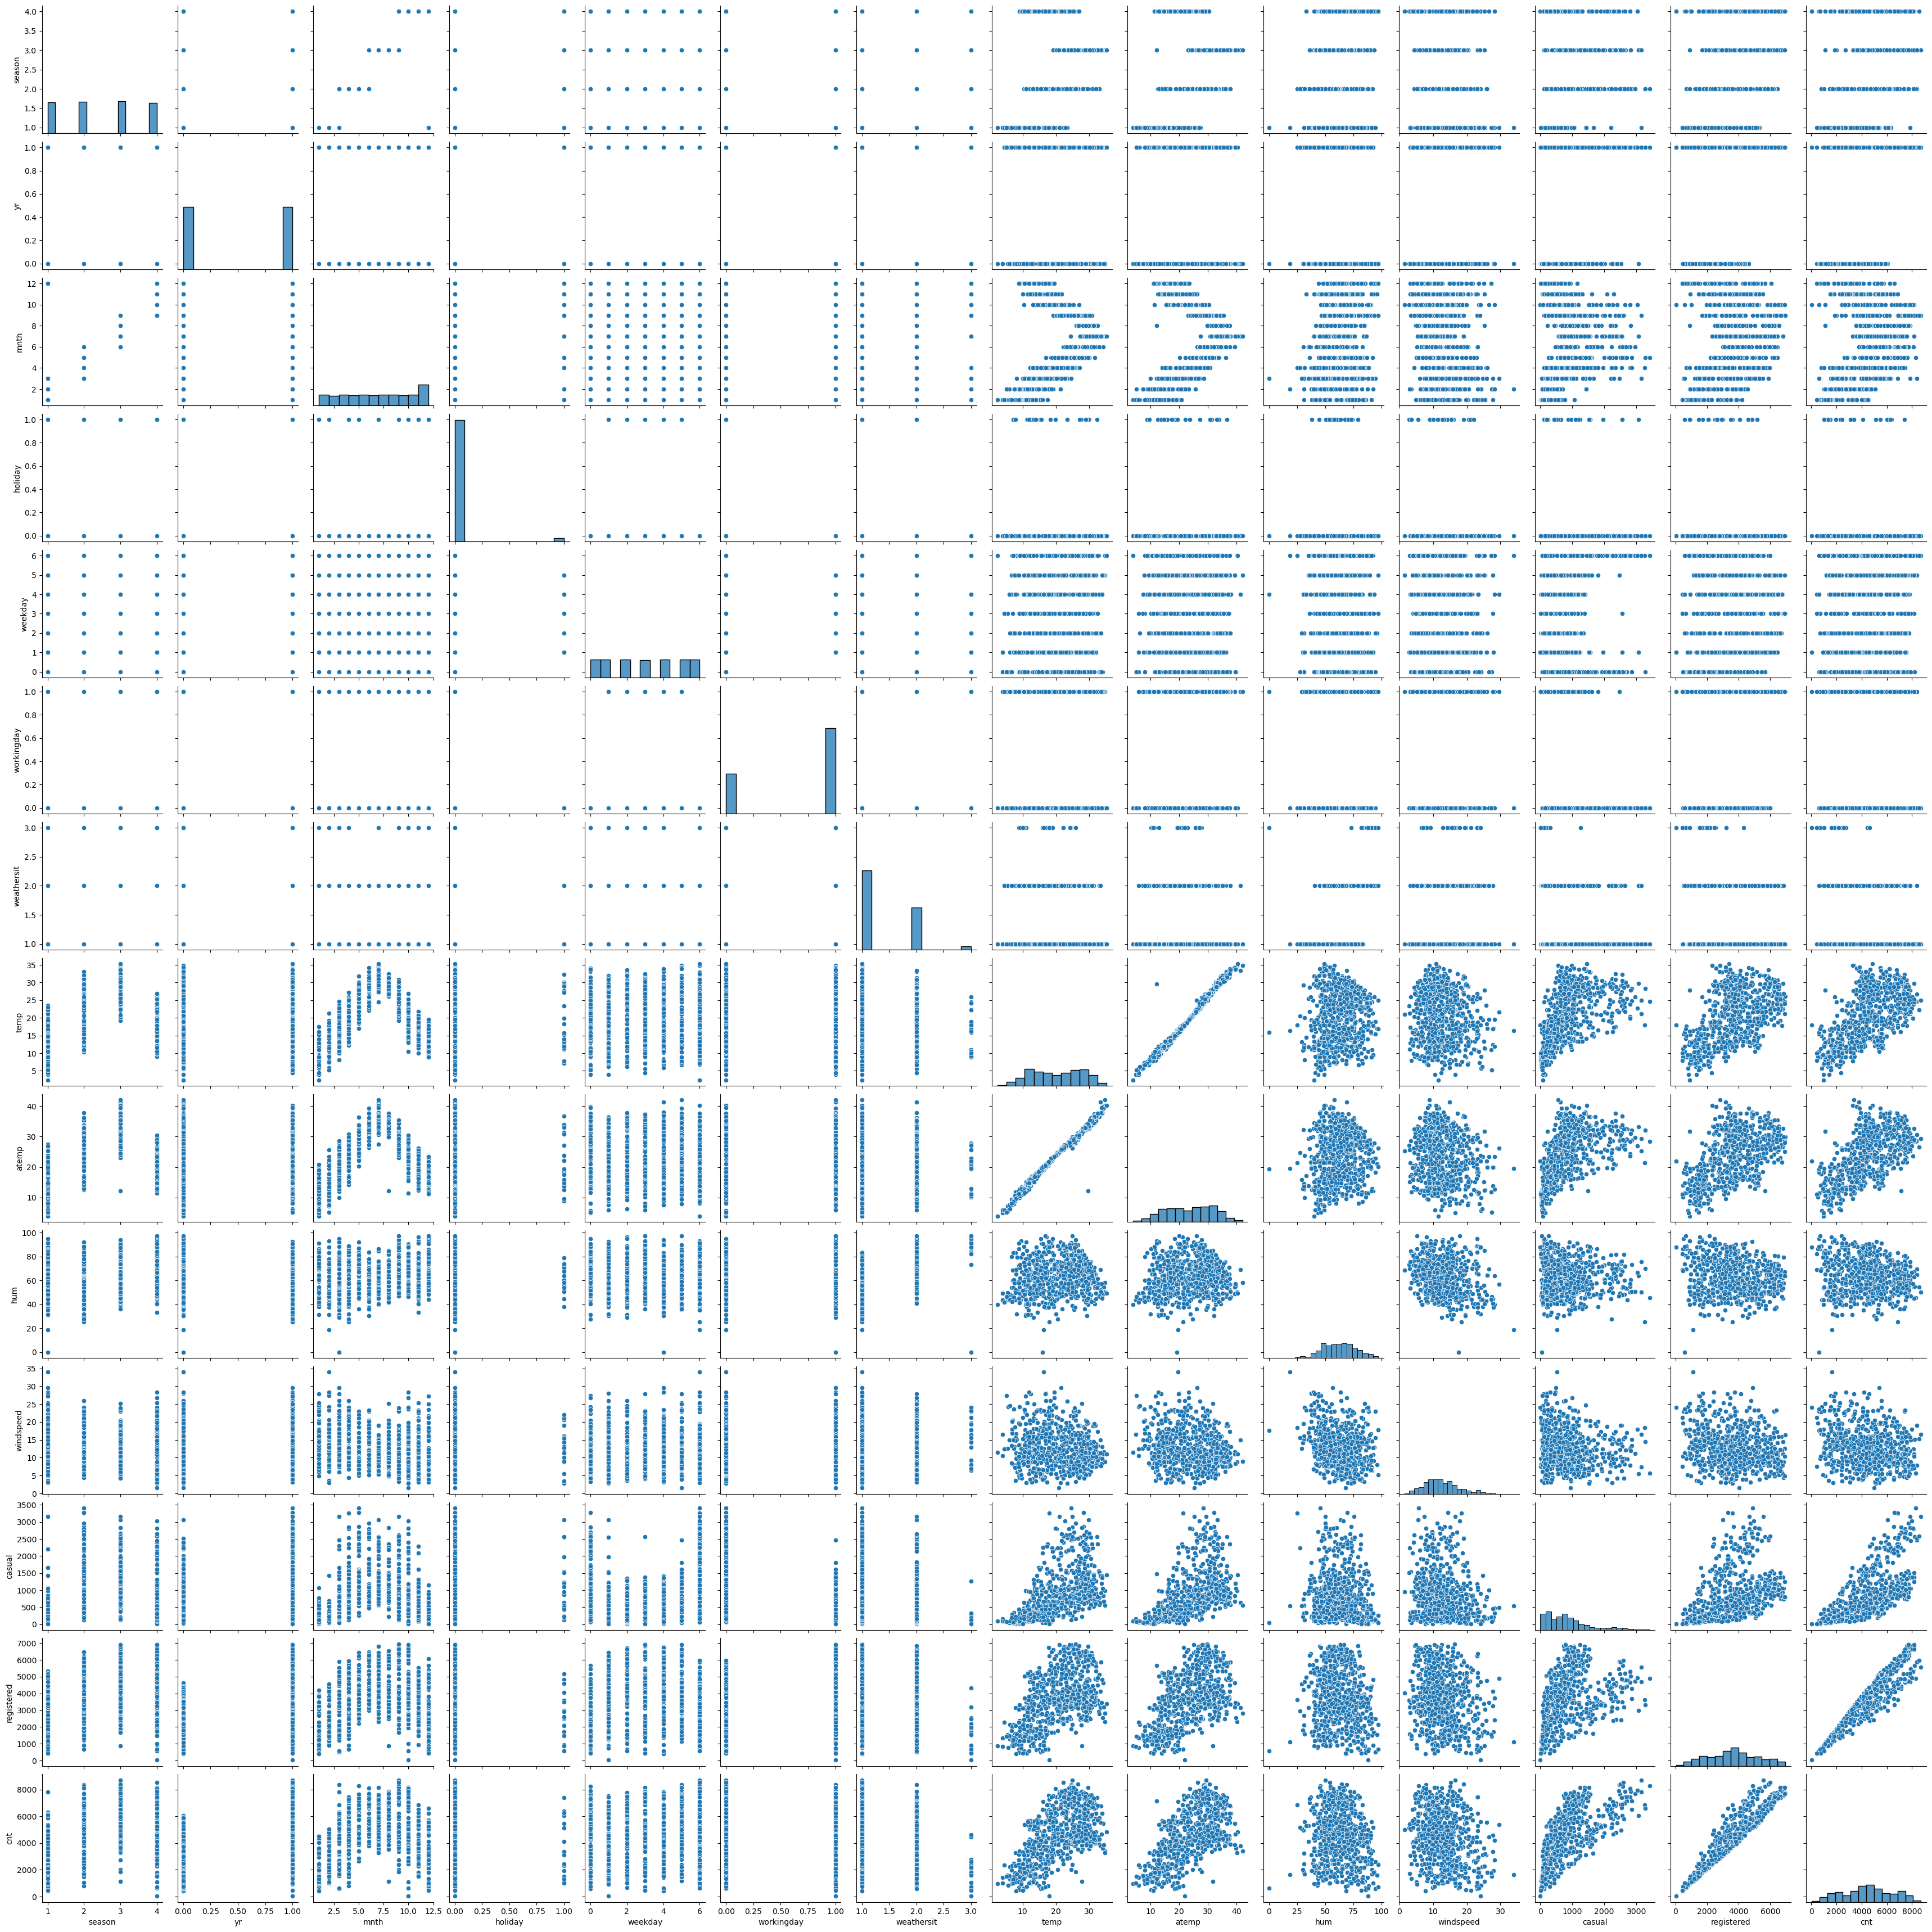

In [8]:
#Visualising the data
sns.pairplot(data_bikes)
plt.show()

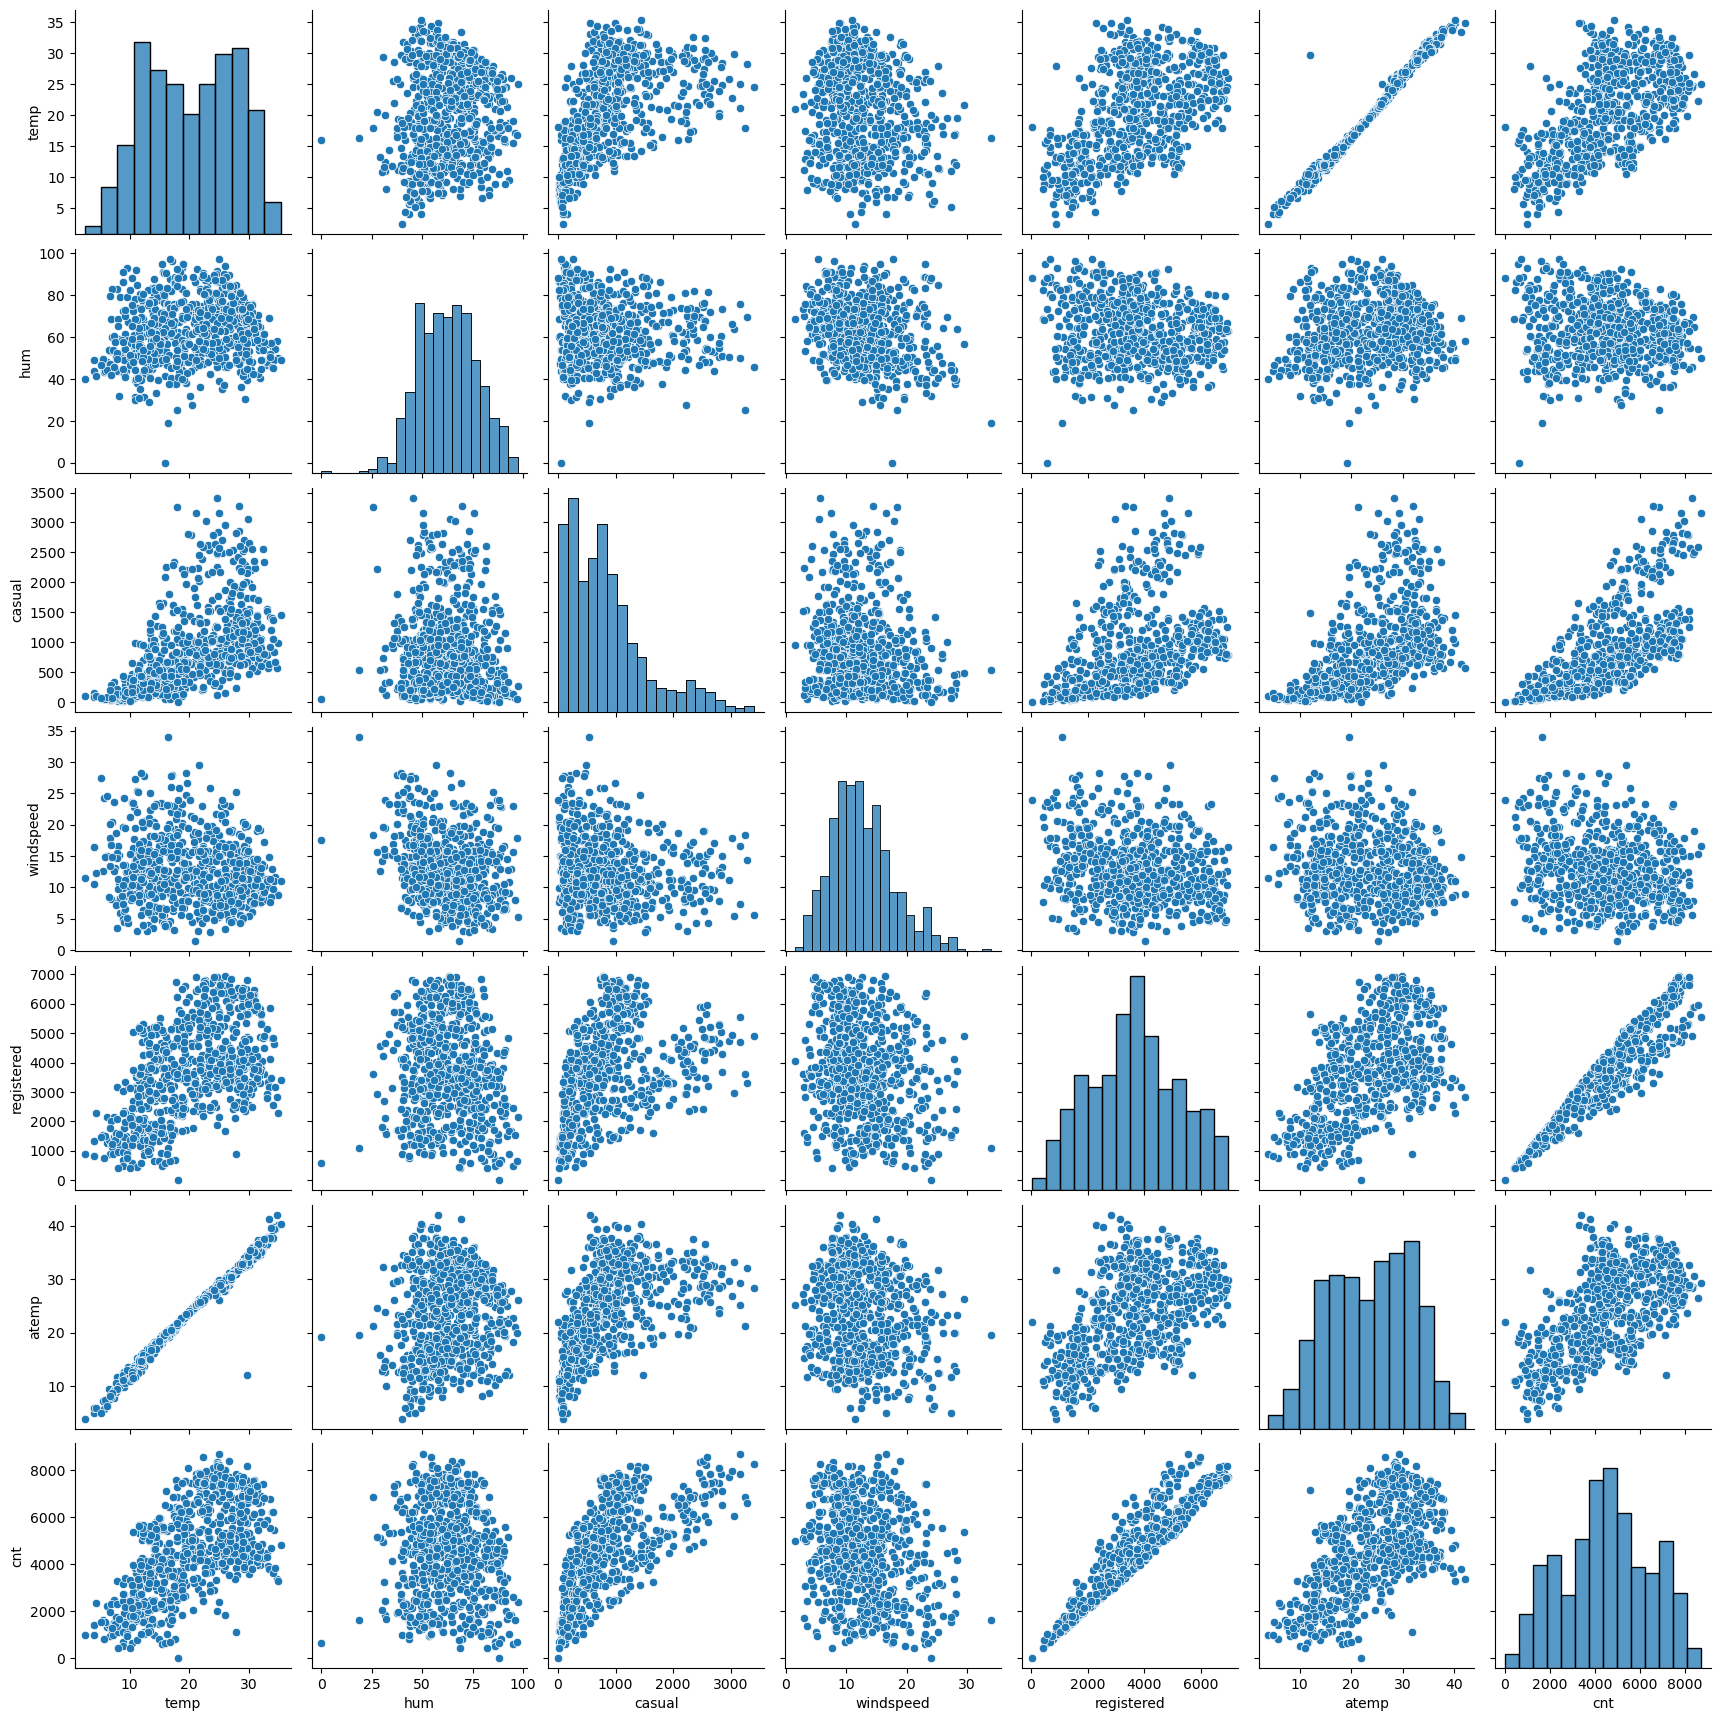

In [9]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(data_bikes, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

### There is strong correlation between the count variable and temperature, humidity and windspeed. we can clearly see this from graph. We will explore these with other different variable.

In [10]:
#mapping categorical variables with their subcategories to help with visualization analysis 
data_bikes['season']=data_bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data_bikes['mnth']=data_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data_bikes['weathersit']=data_bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
data_bikes['weekday']=data_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

data_bikes.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

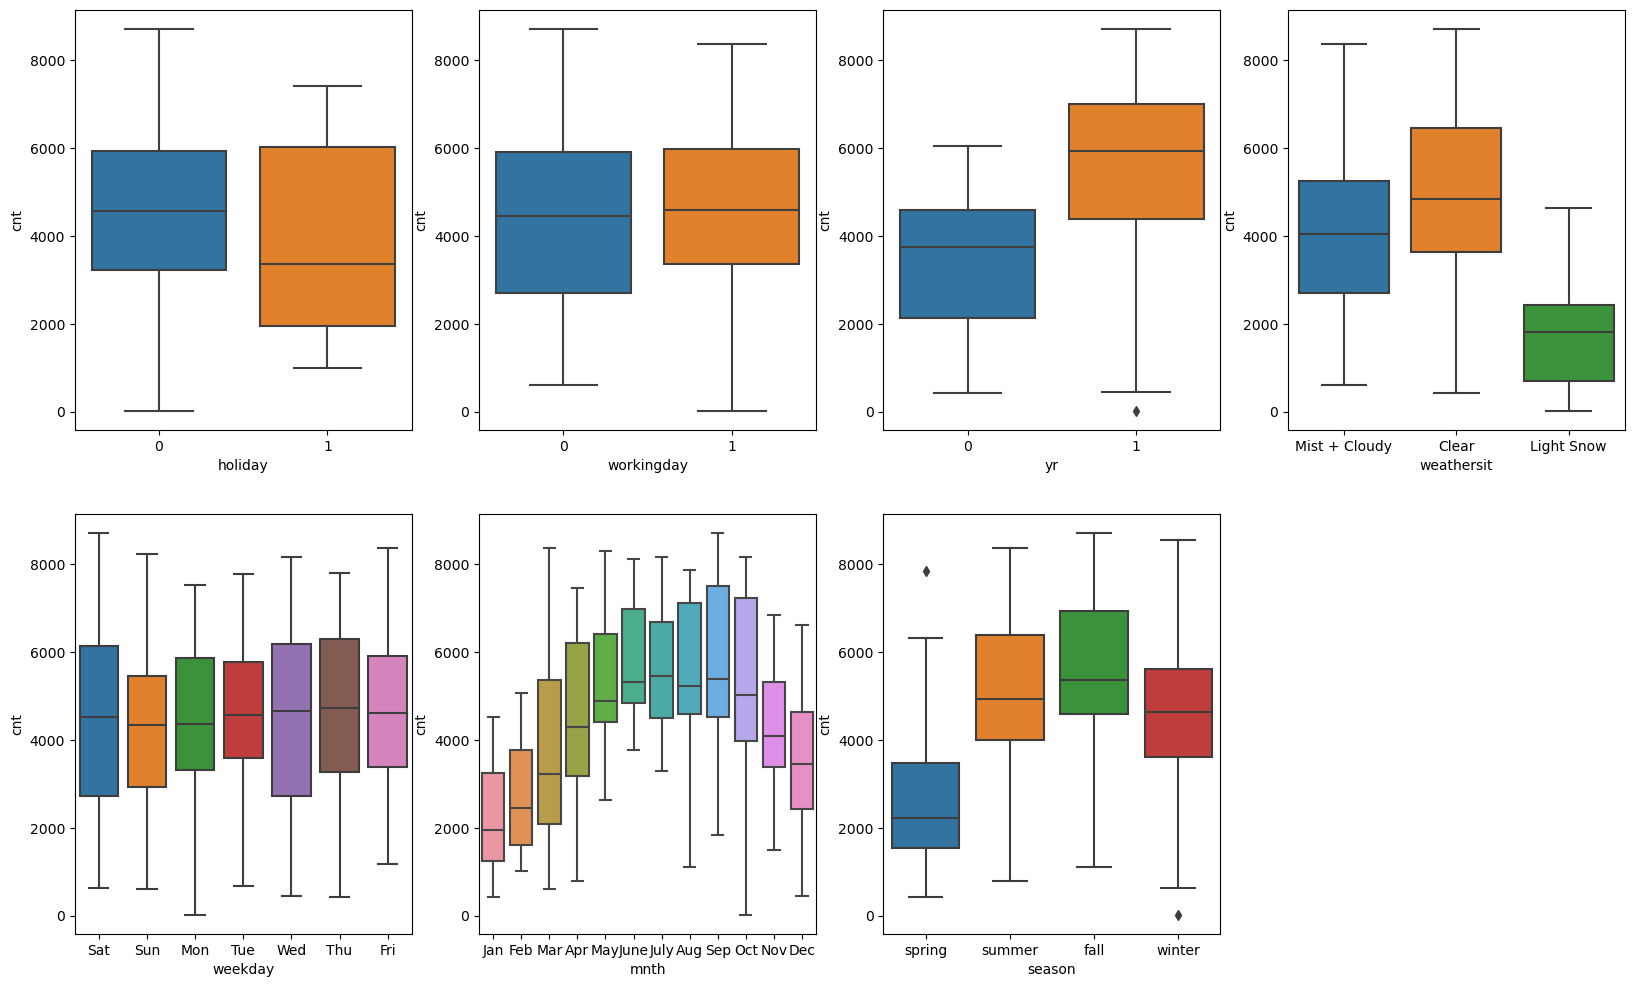

In [11]:
#visualizing the categorical variables of the dataset using boxplot 
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)

sns.boxplot(x='holiday', y='cnt', data=data_bikes)
plt.subplot(2, 4, 2)

sns.boxplot(x='workingday', y='cnt', data=data_bikes)
plt.subplot(2, 4, 3)

sns.boxplot(x='yr', y='cnt', data=data_bikes)
plt.subplot(2, 4, 4)

sns.boxplot(x='weathersit', y='cnt', data=data_bikes)
plt.subplot(2, 4, 5)

sns.boxplot(x='weekday', y='cnt', data=data_bikes)
plt.subplot(2, 4, 6)

sns.boxplot(x='mnth', y='cnt', data=data_bikes)
plt.subplot(2, 4, 7)

sns.boxplot(x='season', y='cnt', data=data_bikes)
plt.show()

#### Below are the observation from plots :
#### We have seen that peopel like to rent bike in summer and fall season
#### When it comes to bike rental rates the it is most in September and October 
#### When weather is clear people are taking buke on rent.
#### Mostly bikes are rented on Saturday, Wednesday and Thursday
#### In year 2019 people rented bike more
#### There is no majore difference of rental Whether working day or weekend
#### We can also observe that Bike rental are higher on holidays

#### Now, let us try to conduct a linear regression model as we can see in the above plots about the correlation between varuables



In [12]:
data_bikes.shape

(730, 14)

In [13]:
data_bikes.drop(['atemp', 'casual', 'registered'], axis=1, inplace=True)

In [14]:
data_bikes.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [15]:
data_bikes.shape

(730, 11)

In [16]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [17]:
data_bikes.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

In [18]:
data_bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [19]:
### creating month, weekday, weathersit and season as dummy variables for more analysis
season = pd.get_dummies(data_bikes.season, drop_first=True)
weathersit = pd.get_dummies(data_bikes.weathersit, drop_first=True)
weekday = pd.get_dummies(data_bikes.weekday, drop_first=True)
month = pd.get_dummies(data_bikes.mnth, drop_first=True)



In [20]:
#adding the dummy variables to data_bikes
data_bikes = pd.concat([data_bikes,month, weekday, weathersit, season], axis=1)
data_bikes.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Sat           0  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Sun           0  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Mon           1          Clear   8.050924   
3  spring   0  Jan        0     Tue           1          Clear   8.200000   
4  spring   0  Jan        0     Wed           1          Clear   9.305237   

       hum  windspeed  ...    Sat    Sun    Thu    Tue    Wed  Light Snow  \
0  80.5833  10.749882  ...   True  False  False  False  False       False   
1  69.6087  16.652113  ...  False   True  False  False  False       False   
2  43.7273  16.636703  ...  False  False  False  False  False       False   
3  59.0435  10.739832  ...  False  False  False   True  False       False   
4  43.6957  12.522300  ...  False  False  False  False   True       False   

   Mist + Cloudy  spring  summer  winter  
0           True    True   False   False  
1           True    True   False   False  
2          False    True   False   False  
3          False    True   False   False  
4          False    True   False   False  

[5 rows x 33 columns]

In [21]:
data_bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'Aug', 'Dec', 'Feb',
       'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')

In [22]:
# dropping the original columns season,mnth,weekday,weathersit since we have created the dummies for it
data_bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
data_bikes.head()

yr  holiday  workingday       temp      hum  windspeed   cnt    Aug    Dec  \
0   0        0           0  14.110847  80.5833  10.749882   985  False  False   
1   0        0           0  14.902598  69.6087  16.652113   801  False  False   
2   0        0           1   8.050924  43.7273  16.636703  1349  False  False   
3   0        0           1   8.200000  59.0435  10.739832  1562  False  False   
4   0        0           1   9.305237  43.6957  12.522300  1600  False  False   

     Feb  ...    Sat    Sun    Thu    Tue    Wed  Light Snow  Mist + Cloudy  \
0  False  ...   True  False  False  False  False       False           True   
1  False  ...  False   True  False  False  False       False           True   
2  False  ...  False  False  False  False  False       False          False   
3  False  ...  False  False  False   True  False       False          False   
4  False  ...  False  False  False  False   True       False          False   

   spring  summer  winter  
0    True   False   False  
1    True   False   False  
2    True   False   False  
3    True   False   False  
4    True   False   False  

[5 rows x 29 columns]

In [23]:
data_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [24]:
#Convert the true/false values to 1 and 0
varlist = [ 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter' ]
data_bikes[varlist] = data_bikes[varlist].apply(lambda x: x.map({True:1, False:0}))
data_bikes[varlist].head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  Sat  Sun  Thu  \
0    0    0    0    1     0     0    0    0    0    0  ...    1    0    0   
1    0    0    0    1     0     0    0    0    0    0  ...    0    1    0   
2    0    0    0    1     0     0    0    0    0    0  ...    0    0    0   
3    0    0    0    1     0     0    0    0    0    0  ...    0    0    0   
4    0    0    0    1     0     0    0    0    0    0  ...    0    0    0   

   Tue  Wed  Light Snow  Mist + Cloudy  spring  summer  winter  
0    0    0           0              1       1       0       0  
1    0    0           0              1       1       0       0  
2    0    0           0              0       1       0       0  
3    1    0           0              0       1       0       0  
4    0    1           0              0       1       0       0  

[5 rows x 22 columns]

In [25]:
data_bikes.shape

(730, 29)

In [26]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int64  
 8   Dec            730 non-null    int64  
 9   Feb            730 non-null    int64  
 10  Jan            730 non-null    int64  
 11  July           730 non-null    int64  
 12  June           730 non-null    int64  
 13  Mar            730 non-null    int64  
 14  May            730 non-null    int64  
 15  Nov            730 non-null    int64  
 16  Oct            730 non-null    int64  
 17  Sep            730 non-null    int64  
 18  Mon       

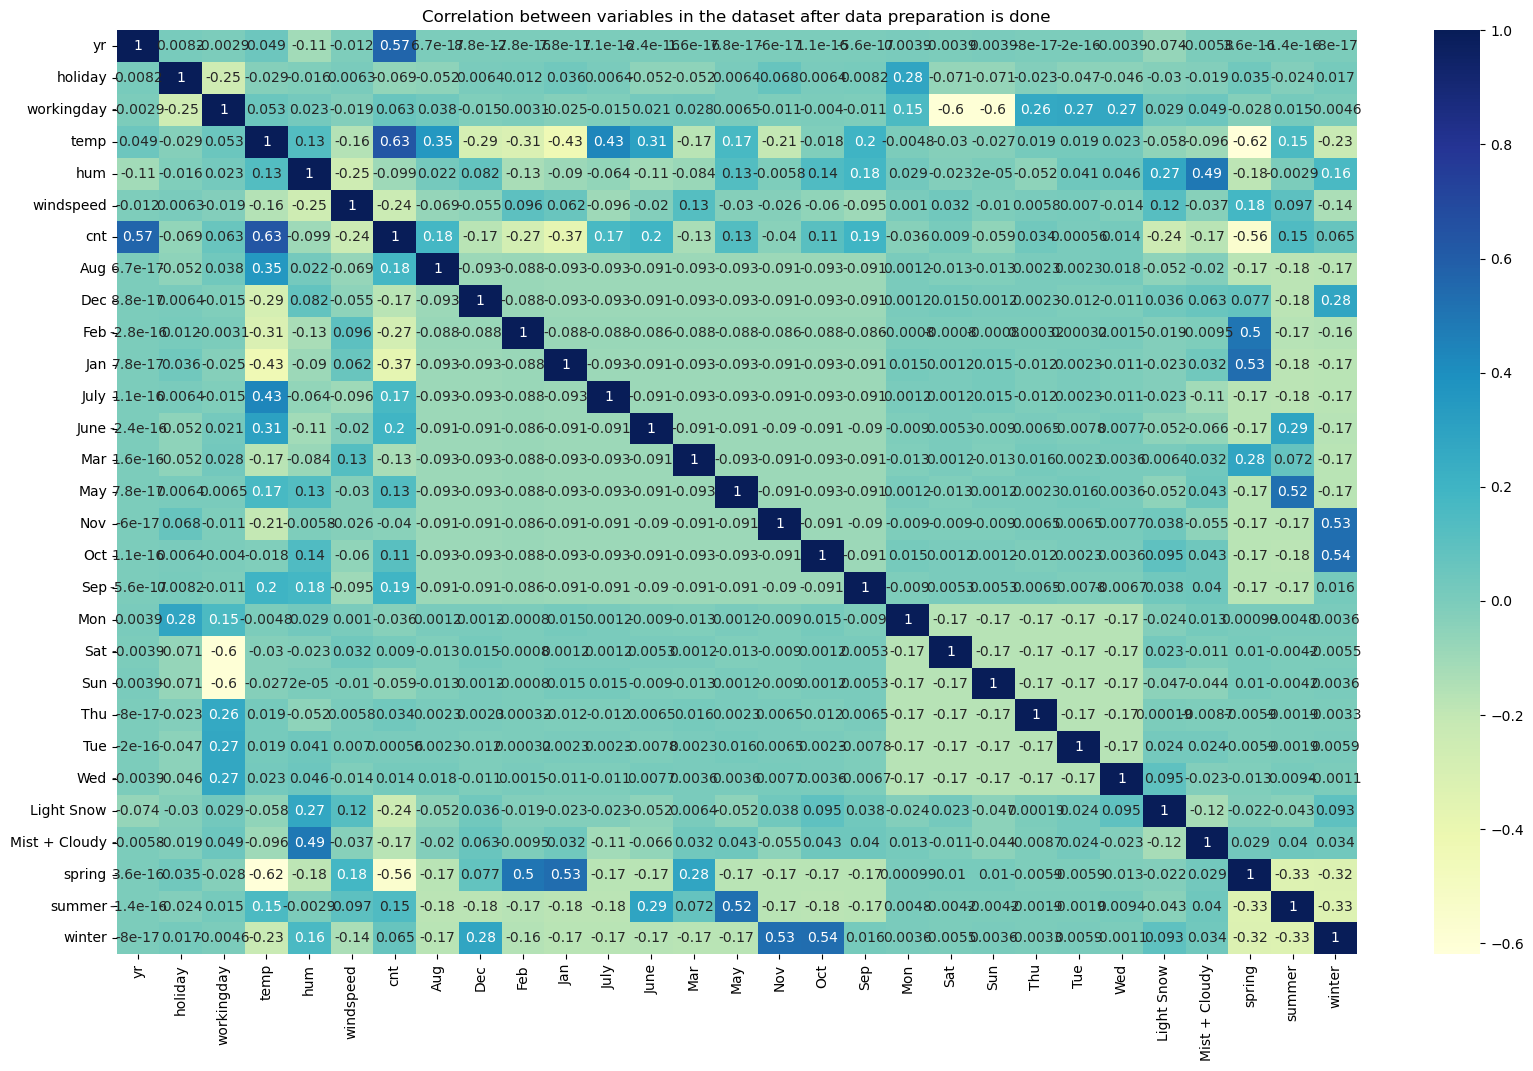

In [27]:
plt.figure(figsize=(20, 12))
sns.heatmap(data_bikes.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation between variables in the dataset after data preparation is done')
plt.show()

In [28]:
#splitting the dataset into train and test sets 70-30
df_train, df_test = train_test_split(data_bikes, train_size=0.7, random_state=100)


In [29]:
df_test.shape

(220, 29)

In [30]:
df_train.shape

(510, 29)

In [31]:
#we are rescaling some variables like  hum, temp, windspeed, cnt since they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [32]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.468282    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.096078    0.084314    0.066667  ...    0.154902   
std      0.224421    0.294988    0.278131    0.249689  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.143137    0.133333    0.131373    0.158824    0.029412   
std      0.350557    0.340268    0.338139    0.365870    0.169124   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy      spring      summer      winter  
count     510.000000  510.000000  510.000000  510.000000  
mean        0.345098    0.243137    0.247059    0.247059  
std         0.475867    0.429398    0.431725    0.431725  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    0.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

#### checking corelation 

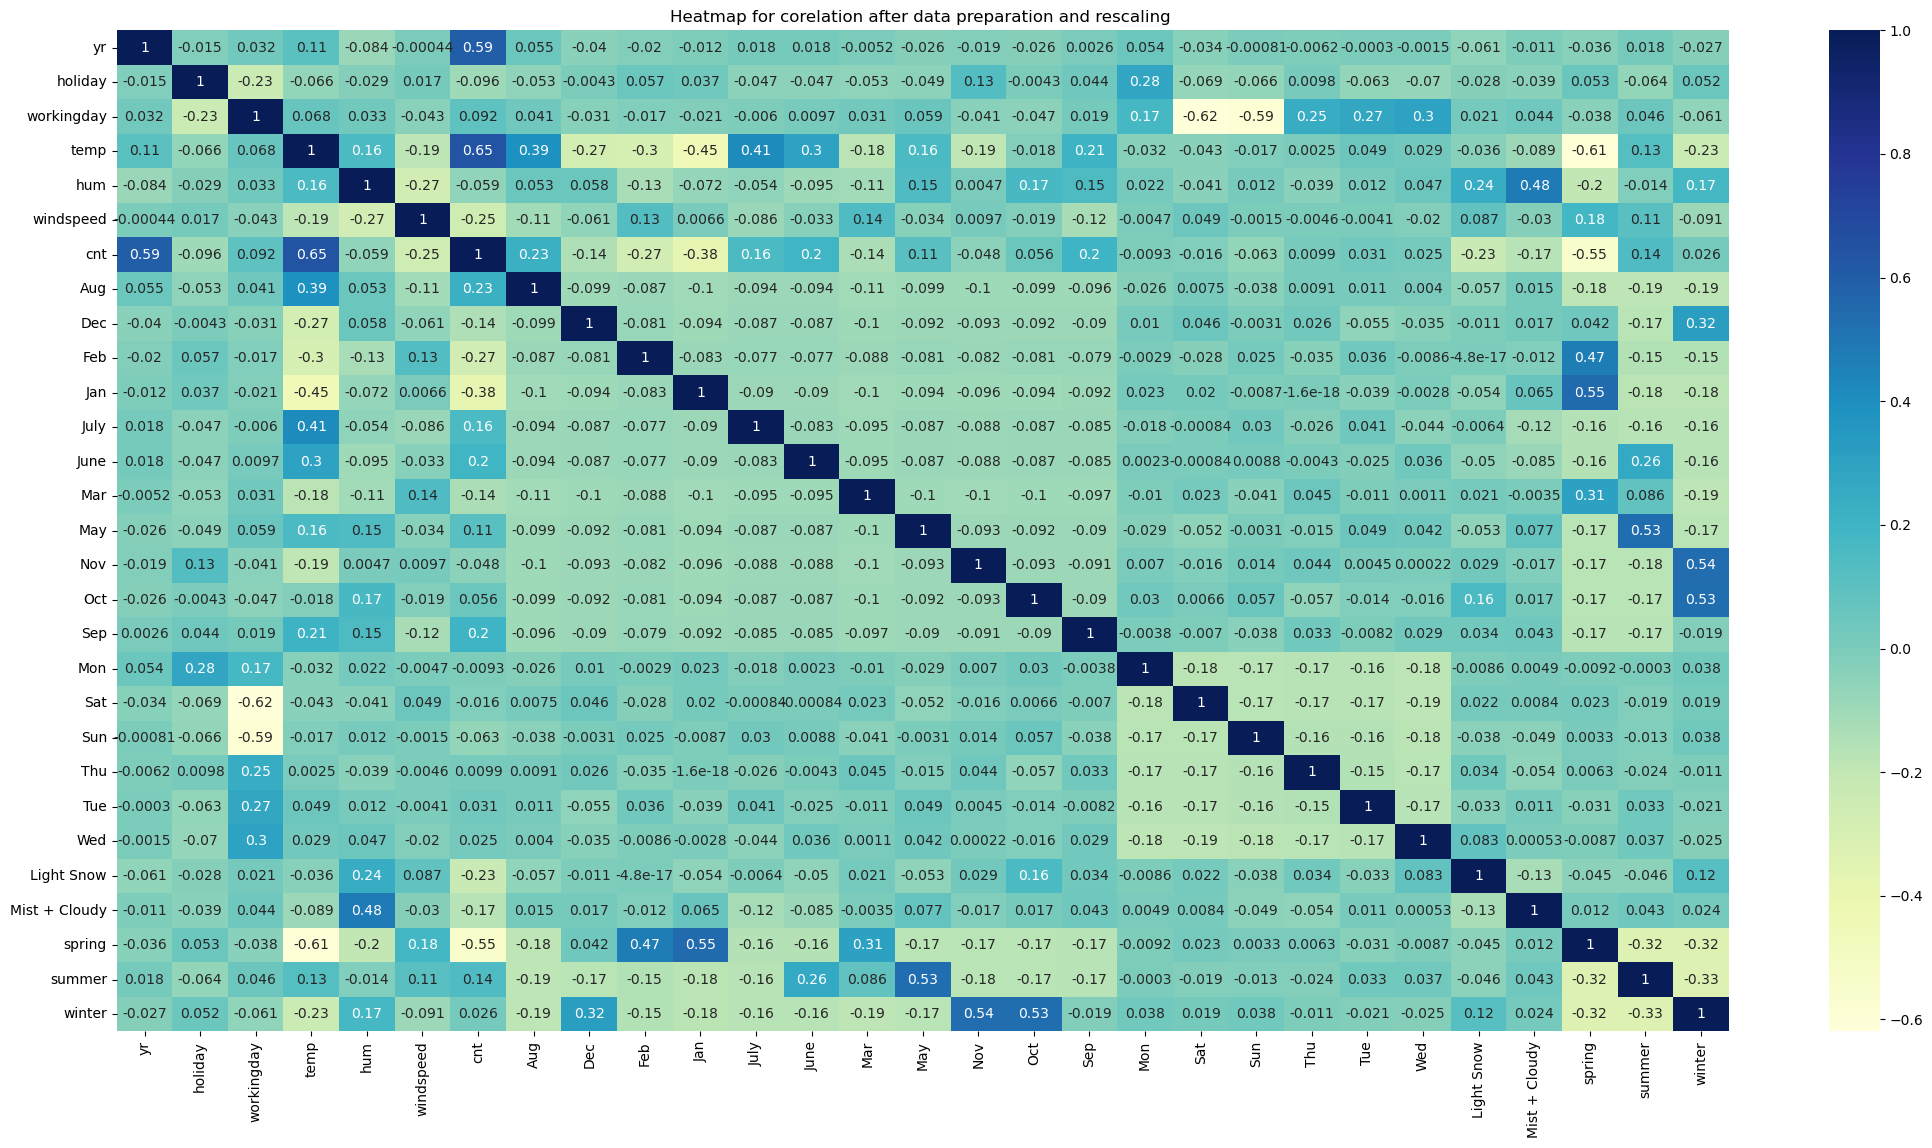

In [33]:
plt.figure(figsize = (26, 13))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap for corelation after data preparation and rescaling ')
plt.show()


##### The count has a heavy correlation of 0.65 with temperature variable. Lets observe the variance using pairplots

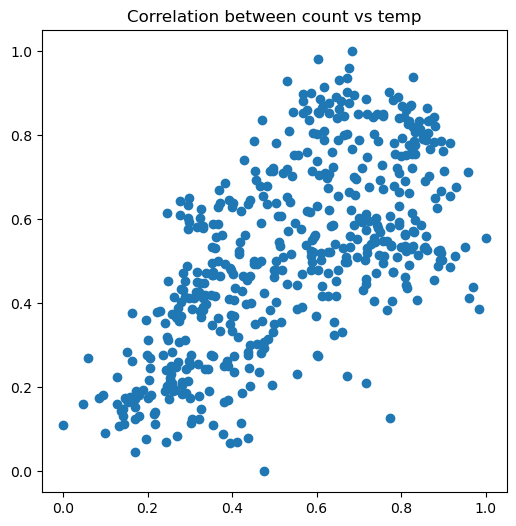

In [34]:

#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [35]:
#building our first model using the variable temp
#preparing the variables for model building 

y_train = df_train.pop('cnt')
X_train = df_train


In [36]:
X_train.head(5)

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
576   1        0           1  0.815169  0.725633   0.264686    0    0    0   
426   1        0           0  0.442393  0.640189   0.255342    0    0    0   
728   1        0           0  0.245101  0.498067   0.663106    0    1    0   
482   1        0           0  0.395666  0.504508   0.188475    0    0    0   
111   0        0           1  0.345824  0.751824   0.380981    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
576    0  ...    0    0    0    1    0           0              0       0   
426    0  ...    1    0    0    0    0           0              1       1   
728    0  ...    0    1    0    0    0           0              0       1   
482    0  ...    1    0    0    0    0           0              1       0   
111    0  ...    0    0    0    0    0           0              1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 28 columns]

In [37]:
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [38]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create our 1st model
lr = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model = lr.fit()

#checking params
lr_model.params


const    0.169031
temp     0.640944
dtype: float64

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.46e-61
Time:                        18:08:31   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

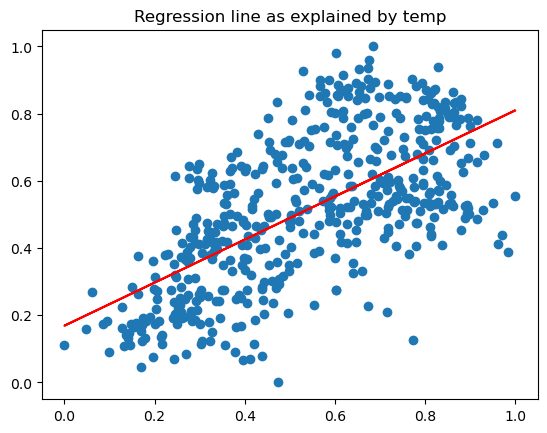

In [40]:

#drawing  a scatter plot and checking regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Regression line as explained by temp')
plt.show()


#### Performing multiple regression  by adding more variables
#### Adding variable yr and checking to see if it improves the R-squared


In [41]:
X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create 2nd  model
lr = sm.OLS(y_train, X_train_sm)

#fitting the model 
lr_model = lr.fit()

#checking params
lr_model.params


const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [42]:
#checking summary with temp and yr 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.34e-130
Time:                        18:08:33   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
data_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [44]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [45]:
X_train_sm = sm.add_constant(X_train)

#create 3rd model
lr = sm.OLS(y_train, X_train_sm)

#fitting the model
lr_model = lr.fit()

#checking params
lr_model.params


const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.00e-181
Time:                        18:08:35   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.50e+15
================================================================

In [47]:
len(data_bikes.columns)

29

In [48]:
#RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)



In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 13),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 9),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 11),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [51]:
#storing the selected feature variables in  one variable
true_rfe = X_train.columns[rfe.support_]

In [52]:
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [53]:
len(true_rfe)

#creating model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[true_rfe]


#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating 1st training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fitting model
lr_model = lr.fit()

#checking params
lr_model.params

const            0.199526
yr               0.229763
holiday         -0.018447
workingday       0.083669
temp             0.527708
hum             -0.161086
windspeed       -0.180875
July            -0.054616
Sep              0.081983
Sat              0.093668
Sun              0.040636
Light Snow      -0.245009
Mist + Cloudy   -0.056344
spring          -0.055546
summer           0.053733
winter           0.099214
dtype: float64

##### checking summery

In [54]:
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        18:08:40   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0937      0.012      8.040      0.000       0.071       0.117
Sun               0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)


In [56]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2      workingday  50.68
8             Sat  12.20
9             Sun  11.79
12         spring   5.02
3            temp   3.62
14         winter   3.49
1         holiday   2.91
13         summer   2.62
4             hum   1.91
11  Mist + Cloudy   1.57
6            July   1.49
7             Sep   1.30
10     Light Snow   1.25
5       windspeed   1.20
0              yr   1.03

In [57]:
#workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)


In [58]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with RFE selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.28e-188
Time:                        18:08:42   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1355      0.024      5.691      0.000       0.089       0.182
yr                0.2337      0.008     28.828      0.000       0.218       0.250
holiday          -0.0347      0.021     -1.628      0.104      -0.077       0.007
workingday        0.0682      0.009      7.475      0.000       0.050       0.086
temp              0.4915      0.033     15.027      0.000       0.427       0.556
windspeed        -0.1491      0.025     -6.024      0.000      -0.198      -0.100
July             -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep               0.0759      0.017      4.537      0.000       0.043       0.109
Sat               0.0799      0.011      7.010      0.000       0.058       0.102
Sun               0.0221      0.012      1.889      0.059      -0.001       0.045
Light Snow       -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0477      0.015      3.180      0.002       0.018       0.077
winter            0.0846      0.017      4.971      0.000       0.051       0.118
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                     1.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.45e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1, inplace=True)


In [60]:

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


Features    VIF
2      workingday  35.88
7             Sat   8.96
8             Sun   8.41
11         spring   4.96
3            temp   3.39
13         winter   3.35
12         summer   2.60
1         holiday   2.34
5            July   1.48
6             Sep   1.29
4       windspeed   1.10
9      Light Snow   1.05
10  Mist + Cloudy   1.05
0              yr   1.02

In [61]:
#Temp variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['temp'], axis = 1)


In [62]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     127.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.95e-148
Time:                        18:08:45   Log-Likelihood:                 412.57
No. Observations:                 510   AIC:                            -797.1
Df Residuals:                     496   BIC:                            -737.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4480      0.028     15.954      0.000       0.393       0.503
yr                0.2471      0.010     25.329      0.000       0.228       0.266
holiday           0.0419      0.026      1.630      0.104      -0.009       0.092
workingday        0.1486      0.011     13.840      0.000       0.128       0.170
hum              -0.0113      0.044     -0.254      0.800      -0.098       0.076
windspeed        -0.1736      0.031     -5.566      0.000      -0.235      -0.112
July             -0.0102      0.022     -0.466      0.642      -0.053       0.033
Sep               0.0722      0.020      3.567      0.000       0.032       0.112
Sat               0.1560      0.013     11.583      0.000       0.130       0.182
Sun               0.1015      0.014      7.102      0.000       0.073       0.130
Light Snow       -0.2982      0.032     -9.393      0.000      -0.361      -0.236
Mist + Cloudy    -0.0897      0.012     -7.187      0.000      -0.114      -0.065
spring           -0.2994      0.017    -17.791      0.000      -0.333      -0.266
summer           -0.0439      0.017     -2.655      0.008      -0.076      -0.011
winter           -0.0763      0.016     -4.780      0.000      -0.108      -0.045
==============================================================================
Omnibus:                       28.464   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.788
Skew:                          -0.319   Prob(JB):                     1.72e-13
Kurtosis:                       4.536   Cond. No.                     1.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)


#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif



Features    VIF
2      workingday  33.73
7             Sat   8.38
8             Sun   8.29
1         holiday   2.29
11         spring   2.23
12         summer   2.17
13         winter   2.02
3             hum   1.78
10  Mist + Cloudy   1.50
5            July   1.45
6             Sep   1.29
9      Light Snow   1.23
4       windspeed   1.20
0              yr   1.02

In [64]:
#hum variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['hum'], axis = 1)


In [65]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating 1st training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fitting the model
lr_model = lr.fit()

#summary
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.68e-149
Time:                        18:08:47   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4419      0.015     29.828      0.000       0.413       0.471
yr                0.2473      0.010     25.463      0.000       0.228       0.266
holiday           0.0404      0.025      1.617      0.107      -0.009       0.089
workingday        0.1471      0.009     16.373      0.000       0.129       0.165
windspeed        -0.1713      0.030     -5.753      0.000      -0.230      -0.113
July             -0.0101      0.022     -0.460      0.646      -0.053       0.033
Sep               0.0718      0.020      3.561      0.000       0.032       0.111
Sat               0.1546      0.012     12.502      0.000       0.130       0.179
Sun               0.0998      0.013      7.911      0.000       0.075       0.125
Light Snow       -0.3012      0.029    -10.262      0.000      -0.359      -0.244
Mist + Cloudy    -0.0915      0.010     -8.813      0.000      -0.112      -0.071
spring           -0.2989      0.017    -17.903      0.000      -0.332      -0.266
summer           -0.0438      0.017     -2.654      0.008      -0.076      -0.011
winter           -0.0765      0.016     -4.802      0.000      -0.108      -0.045
==============================================================================
Omnibus:                       28.560   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.864
Skew:                          -0.321   Prob(JB):                     1.65e-13
Kurtosis:                       4.536   Cond. No.                     1.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.49e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### checking the VIF of the model 

In [66]:
#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2      workingday  8.23
6             Sat  2.76
7             Sun  2.59
10         spring  2.20
11         summer  2.17
12         winter  2.02
4            July  1.45
1         holiday  1.32
5             Sep  1.29
3       windspeed  1.09
8      Light Snow  1.05
9   Mist + Cloudy  1.04
0              yr  1.01

In [67]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['windspeed'], axis = 1)


In [68]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating 1st training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fitting the model
lr_model = lr.fit()

#summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.14e-143
Time:                        18:08:49   Log-Likelihood:                 396.09
No. Observations:                 510   AIC:                            -768.2
Df Residuals:                     498   BIC:                            -717.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4035      0.014     29.570      0.000       0.377       0.430
yr                0.2464      0.010     24.600      0.000       0.227       0.266
holiday           0.0288      0.026      1.123      0.262      -0.022       0.079
workingday        0.1397      0.009     15.226      0.000       0.122       0.158
July             -0.0092      0.023     -0.406      0.685      -0.054       0.035
Sep               0.0768      0.021      3.692      0.000       0.036       0.118
Sat               0.1434      0.013     11.378      0.000       0.119       0.168
Sun               0.0916      0.013      7.082      0.000       0.066       0.117
Light Snow       -0.3187      0.030    -10.578      0.000      -0.378      -0.259
Mist + Cloudy    -0.0898      0.011     -8.386      0.000      -0.111      -0.069
spring           -0.3163      0.017    -18.668      0.000      -0.350      -0.283
summer           -0.0578      0.017     -3.430      0.001      -0.091      -0.025
winter           -0.0795      0.016     -4.843      0.000      -0.112      -0.047
==============================================================================
Omnibus:                       35.751   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.815
Skew:                          -0.335   Prob(JB):                     1.90e-20
Kurtosis:                       4.956   Cond. No.                     1.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.87e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:

#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2      workingday  6.39
5             Sat  2.27
6             Sun  2.19
9          spring  2.12
10         summer  2.12
11         winter  2.02
3            July  1.45
4             Sep  1.28
1         holiday  1.24
7      Light Snow  1.04
8   Mist + Cloudy  1.04
0              yr  1.01


#### For all the variables, VIF is <5. Also, P-Valye < 0.05 or almost zero. R-Squared value is 0.76. So, so i think we are decent with model




#### Next step : Residual analysis


In [70]:
X_train_lr3 = sm.add_constant(X_train_lr3)
#X_train_lm5.columns
X_train_lr3


const  yr  holiday  workingday  July  Sep  Sat  Sun  Light Snow  \
576    1.0   1        0           1     1    0    0    0           0   
426    1.0   1        0           0     0    0    1    0           0   
728    1.0   1        0           0     0    0    0    1           0   
482    1.0   1        0           0     0    0    1    0           0   
111    1.0   0        0           1     0    0    0    0           0   
..     ...  ..      ...         ...   ...  ...  ...  ...         ...   
578    1.0   1        0           1     0    0    0    0           0   
53     1.0   0        0           1     0    0    0    0           0   
350    1.0   0        0           0     0    0    1    0           0   
79     1.0   0        0           1     0    0    0    0           0   
520    1.0   1        0           1     0    0    0    0           0   

     Mist + Cloudy  spring  summer  winter  
576              0       0       0       0  
426              1       1       0       0  
728              0       1       0       0  
482              1       0       1       0  
111              1       0       1       0  
..             ...     ...     ...     ...  
578              0       0       0       0  
53               0       1       0       0  
350              1       0       0       1  
79               1       0       1       0  
520              1       0       1       0  

[510 rows x 13 columns]

In [71]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr3)

In [72]:
y_train_pred

576    0.780455
426    0.387234
728    0.425243
482    0.645740
111    0.395644
         ...   
578    0.789633
53     0.226914
350    0.377578
79     0.395644
520    0.642067
Length: 510, dtype: float64

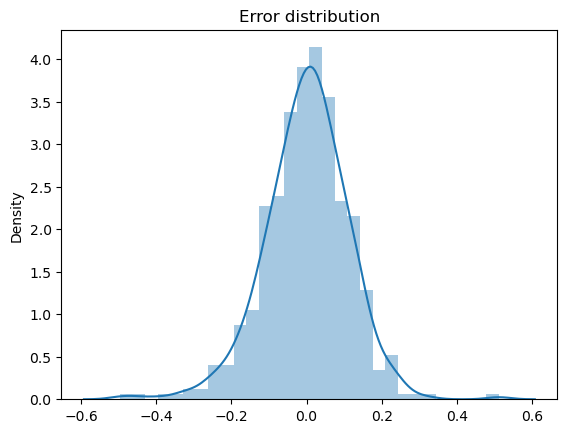

In [73]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()


In [74]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [75]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])
df_test.describe


<bound method NDFrame.describe of      yr  holiday  workingday      temp       hum  windspeed       cnt  Aug  \
184   0        1           0  0.831783  0.657364   0.084219  0.692706    0   
535   1        0           1  0.901354  0.610133   0.153728  0.712034    0   
299   0        0           1  0.511964  0.837699   0.334206  0.303382    0   
221   0        0           1  0.881625  0.437098   0.339570  0.547400    1   
152   0        0           1  0.817246  0.314298   0.537414  0.569029    0   
..   ..      ...         ...       ...       ...        ...       ...  ...   
702   1        0           1  0.519232  0.756118   0.283397  0.757478    0   
127   0        0           0  0.584649  0.650923   0.069510  0.495973    0   
640   1        0           1  0.745598  0.817947   0.052115  0.868615    0   
72    0        0           1  0.331557  0.512107   0.203418  0.232858    0   
653   1        0           1  0.509887  0.575354   0.300794  0.864243    0   

     Dec  Feb  ...  Sat  Sun 

In [76]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
X_test.head(5)

yr  holiday  workingday      temp       hum  windspeed  Aug  Dec  Feb  \
184   0        1           0  0.831783  0.657364   0.084219    0    0    0   
535   1        0           1  0.901354  0.610133   0.153728    0    0    0   
299   0        0           1  0.511964  0.837699   0.334206    0    0    0   
221   0        0           1  0.881625  0.437098   0.339570    1    0    0   
152   0        0           1  0.817246  0.314298   0.537414    0    0    0   

     Jan  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
184    0  ...    0    0    0    0    0           0              1       0   
535    0  ...    0    0    0    0    1           0              0       0   
299    0  ...    0    0    1    0    0           0              1       0   
221    0  ...    0    0    0    0    1           0              0       0   
152    0  ...    0    0    1    0    0           0              0       0   

     summer  winter  
184       0       0  
535       1       0  
299       0       1  
221       0       0  
152       1       0  

[5 rows x 28 columns]

In [78]:
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [79]:
#Printing feature variables
X_train_lr3.columns

Index(['const', 'yr', 'holiday', 'workingday', 'July', 'Sep', 'Sat', 'Sun',
       'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [80]:
#dropping constant
X_train_lr3.drop(columns= 'const', inplace = True)

In [81]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr3.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)


In [82]:
#prediction is happening here
y_pred = lr_model.predict(X_test_new)

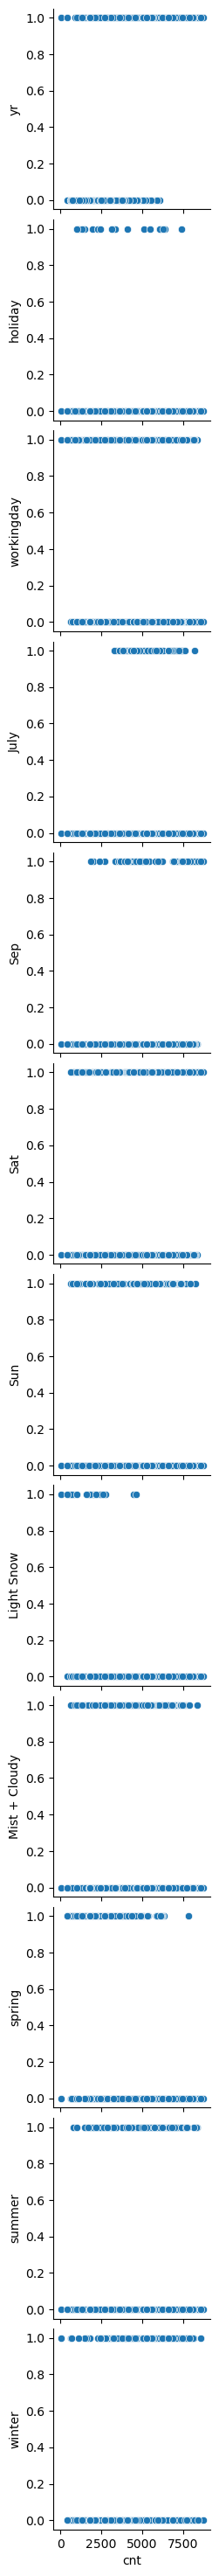

<Figure size 2600x2000 with 0 Axes>

In [87]:
#build a scatter plot to observe relationship between the dependent and the feature variables
sns.pairplot(data_bikes, y_vars=X_train_lr3.columns, x_vars='cnt')
plt.figure(figsize = (26, 20))
plt.show()

### We can now validate the assumptions of linear regression in the model:
##### As we can see, temperature has a linear relationship with the dependent variable (cnt).
###### As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.
### The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.
#
###### Step 5: Prediction and evaluation of the test set


In [89]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score for the  test set is', r2_test)


r2 score for the  test set is 0.751039353422878


In [90]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score for the  train set is', r2_train)


r2 score for the  train set is 0.7535909260842903


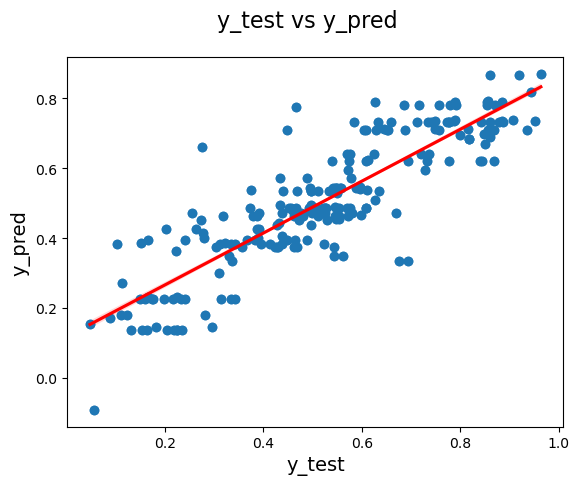

In [91]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()


In [92]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.14e-143
Time:                        18:14:22   Log-Likelihood:                 396.09
No. Observations:                 510   AIC:                            -768.2
Df Residuals:                     498   BIC:                            -717.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4035      0.014     29.570      0.000       0.377       0.430
yr                0.2464      0.010     24.600      0.000       0.227       0.266
holiday           0.0288      0.026      1.123      0.262      -0.022       0.079
workingday        0.1397      0.009     15.226      0.000       0.122       0.158
July             -0.0092      0.023     -0.406      0.685      -0.054       0.035
Sep               0.0768      0.021      3.692      0.000       0.036       0.118
Sat               0.1434      0.013     11.378      0.000       0.119       0.168
Sun               0.0916      0.013      7.082      0.000       0.066       0.117
Light Snow       -0.3187      0.030    -10.578      0.000      -0.378      -0.259
Mist + Cloudy    -0.0898      0.011     -8.386      0.000      -0.111      -0.069
spring           -0.3163      0.017    -18.668      0.000      -0.350      -0.283
summer           -0.0578      0.017     -3.430      0.001      -0.091      -0.025
winter           -0.0795      0.016     -4.843      0.000      -0.112      -0.047
==============================================================================
Omnibus:                       35.751   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.815
Skew:                          -0.335   Prob(JB):                     1.90e-20
Kurtosis:                       4.956   Cond. No.                     1.18e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.87e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:

# Equation of the best fitted line is:
# cnt = 0.2468×yr - 0.06060Xholiday + 0.0486×workingday - 0.0883×Jan - 0.0086×July + 0.0765×Sep + 0.0527×Sat - 0.3220×Light Snow - 0.0868xMist+Cloudy - 0.2844xsprint - 0.0580xsummer - 0.0795xwinter


#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)


Mean squared error of the train set is 0.012385990156056698
Mean squared error of the test set is 0.011903873941797627
